# Data Cleaning

## Missing Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import math

import matplotlib.pyplot as plt # Required for plotting
np.random.seed(33)

In [2]:
incomplete_df = pd.DataFrame({'id': [1,2,3,2,2,3,1,1,1,2,4],
                              'type': ['one', 'one', 'two', np.nan, 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345,928,np.NAN,645,113,942,np.NAN,539,np.NAN,814,np.NAN] 
                             }, columns=['id','type','amount'])


incomplete_df



,id,type,amount
0,1,one,345
1,2,one,928
2,3,two,NaN
3,2,NaN,645
4,2,two,113
5,3,three,942
6,1,one,NaN
7,1,two,539
8,1,one,NaN
9,2,three,814


#### Pandas Provides two functions to check if a cell is null -- is_null() / notnull() 

Note they are inverses of each other

In [3]:
pd.isnull(incomplete_df)

,id,type,amount
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,False
4,False,False,False
5,False,False,False
6,False,False,True
7,False,False,False
8,False,False,True
9,False,False,False


In [4]:
incomplete_df.notnull()

,id,type,amount
0,True,True,True
1,True,True,True
2,True,True,False
3,True,False,True
4,True,True,True
5,True,True,True
6,True,True,False
7,True,True,True
8,True,True,False
9,True,True,True


#### They work on all pandas objects DataFrames and Series

In [5]:
pd.isnull(incomplete_df['amount'])

0     False
1     False
2      True
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10     True
Name: amount, dtype: bool

In [6]:
incomplete_df['amount'].notnull()

0      True
1      True
2     False
3      True
4      True
5      True
6     False
7      True
8     False
9      True
10    False
Name: amount, dtype: bool

### Operations with missing data


#### From the Pandas Documentation

-When summing data, NA (missing) values will be treated as zero  
-If the data are all NA, the result will be NA  
-Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays

In [7]:
print(incomplete_df['id'].mean())
print(incomplete_df['amount'].mean())

2.0
618.0


In [8]:
incomplete_df['amount'].cumsum()

0      345
1     1273
2      NaN
3     1918
4     2031
5     2973
6      NaN
7     3512
8      NaN
9     4326
10     NaN
Name: amount, dtype: float64

# Dealing with Missing Data

## Drop it

In [9]:
incomplete_df

,id,type,amount
0,1,one,345
1,2,one,928
2,3,two,NaN
3,2,NaN,645
4,2,two,113
5,3,three,942
6,1,one,NaN
7,1,two,539
8,1,one,NaN
9,2,three,814


## Rows with any missing data

In [10]:
incomplete_df.dropna(axis=0)

,id,type,amount
0,1,one,345
1,2,one,928
4,2,two,113
5,3,three,942
7,1,two,539
9,2,three,814


## Columns with any missing data

In [11]:
incomplete_df.dropna(axis=1)

,id
0,1
1,2
2,3
3,2
4,2
5,3
6,1
7,1
8,1
9,2


#### You can set a threshold for how many missing values is okay, however the sytax is odd, it's how many non-missing values you have. We can fix it with a little trick on the dataframe size

In [12]:
incomplete_df.dropna(axis=1,thresh=incomplete_df.shape[0]-1)

,id,type
0,1,one
1,2,one
2,3,two
3,2,NaN
4,2,two
5,3,three
6,1,one
7,1,two
8,1,one
9,2,three


### Pandas checks all columns, if we want to check only a single column we need to use our own function

In [13]:
incomplete_df[incomplete_df['amount'].notnull()==True]

,id,type,amount
0,1,one,345
1,2,one,928
3,2,NaN,645
4,2,two,113
5,3,three,942
7,1,two,539
9,2,three,814


## Filling Missing Data

### Filling with Global Constant

In [14]:
incomplete_df.fillna(0)

,id,type,amount
0,1,one,345
1,2,one,928
2,3,two,0
3,2,0,645
4,2,two,113
5,3,three,942
6,1,one,0
7,1,two,539
8,1,one,0
9,2,three,814


### Filling with Column Statistics

In [15]:
incomplete_df.fillna(incomplete_df.mean())

,id,type,amount
0,1,one,345
1,2,one,928
2,3,two,618
3,2,NaN,645
4,2,two,113
5,3,three,942
6,1,one,618
7,1,two,539
8,1,one,618
9,2,three,814


Any guesses why the Type column didn't fill?

In [16]:
#Be careful the fill can be with anything!
incomplete_df.fillna('MISSING')

,id,type,amount
0,1,one,345
1,2,one,928
2,3,two,MISSING
3,2,MISSING,645
4,2,two,113
5,3,three,942
6,1,one,MISSING
7,1,two,539
8,1,one,MISSING
9,2,three,814


You can also fill for specific columns

In [17]:
incomplete_df[['amount']].fillna(0)

,amount
0,345
1,928
2,0
3,645
4,113
5,942
6,0
7,539
8,0
9,814


### A little smarter, lets use the ID of the instance to fill it

##### NOTE! There is still a Missing Value as ID 4 only has 1 amount, which is missing, but it's a start

In [18]:
incomplete_df

,id,type,amount
0,1,one,345
1,2,one,928
2,3,two,NaN
3,2,NaN,645
4,2,two,113
5,3,three,942
6,1,one,NaN
7,1,two,539
8,1,one,NaN
9,2,three,814


In [19]:

incomplete_df["amount"].fillna(incomplete_df.groupby("id")["amount"].mean())

0     345
1     928
2     625
3     645
4     113
5     942
6     NaN
7     539
8     NaN
9     814
10    NaN
Name: amount, dtype: float64

In [20]:
incomplete_df.groupby("id")["amount"].mean()

id
1    442
2    625
3    942
4    NaN
Name: amount, dtype: float64

## Lets try some interpolation

#### Not quite regression filling (as it focuses on fitting the specific column, not the relation between columns, but along those lines

In [21]:
incomplete_df.interpolate()

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,786.5
3,2,NaN,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,740.5
7,1,two,539.0
8,1,one,676.5
9,2,three,814.0


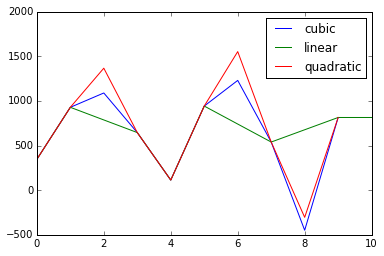

In [22]:
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: incomplete_df['amount'].interpolate(method=m) for m in methods})
df.plot()

## Binning

(array([ 2.,  4.,  3.]),
 array([  0.        ,   9.33333333,  18.66666667,  28.        ]),
 <a list of 3 Patch objects>)

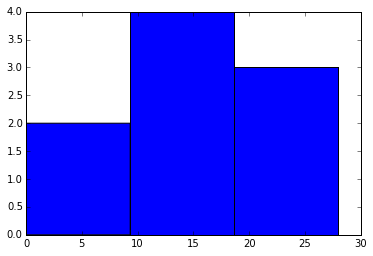

In [23]:
data = [0,4,12,16,16,18,24,26,28]
data = pd.DataFrame(data)
plt.hist(data[0],3)

In [24]:
data = [0,4,12,16,16,18,24,26,28]
num_bins = 3.0
w = (28-0)/num_bins

bin_ranges = []
current_val = np.min(data)
for i in xrange(0,int(num_bins)):
    bin_ranges.append((current_val,np.ceil(current_val+w)))
    current_val= np.ceil(current_val+w)

data = pd.DataFrame(data)
bin_ranges

[(0, 10.0), (10.0, 20.0), (20.0, 30.0)]

In [25]:
for index,bin_range in enumerate(bin_ranges):
    data[(data[0]>=bin_range[0]) & (data[0]<bin_range[1])]=index
    
data

,0
0,0
1,0
2,1
3,1
4,1
5,1
6,2
7,2
8,2


In [26]:
data = [0,4,12,16,16,18,24,26,28]

w = np.ceil(len(data)/3.0)

data = pd.DataFrame(data)
bin_ranges = []
current_val = 0
bin_val = 0
for i in data.iterrows():
    i[1][0]=bin_val
    current_val+=1
    if(current_val==w):
        bin_val+=1
        current_val=0

pd.concat([data,pd.DataFrame([0,4,12,16,16,18,24,26,28])],axis=1)

,0,0
0,0,0
1,0,4
2,0,12
3,1,16
4,1,16
5,1,18
6,2,24
7,2,26
8,2,28


## Outlier Detection

### Statistical Methods



In [27]:
df=pd.DataFrame(np.random.normal(size=2000))
df.head()

,0
0,-0.318854
1,-1.602981
2,-1.535218
3,-0.570401
4,-0.216728


In [28]:
df[np.abs(df[0]-df[0].mean())<=(3*df[0].std())] #keep only the ones that are within +3 to -3 standard deviations

,0
0,-0.318854
1,-1.602981
2,-1.535218
3,-0.570401
4,-0.216728
5,0.254874
6,-0.149450
7,2.010783
8,-0.096784
9,0.422202


In [29]:
q75, q25 = np.percentile(df[0], [75 ,25])
iqr = q75 - q25
1.5*iqr

1.9751158056331399

### Merging Data 

#### Merging multiple data sources can easily cause missing data!

The Full tutorial on merging data can be found here
https://pandas.pydata.org/pandas-docs/stable/merging.html

In [30]:
 df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
    
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7])

df3 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                     'D': ['D2', 'D3', 'D6', 'D7'],
                     'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
    

   

In [31]:
pd.concat([df1,df2],axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [32]:
pd.concat([df1, df3], axis=1, join='inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [33]:
pd.concat([df1, df3], axis=1, join_axes=[df1.index])

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [34]:
data = (pd.DataFrame([(6, 20, 3), (5, 10, 3), (4, 5, 2), (3, 5, 2), (2, 5, 4)]))
data

,0,1,2
0,6,20,3
1,5,10,3
2,4,5,2
3,3,5,2
4,2,5,4


In [35]:
data[~data.duplicated()]

,0,1,2
0,6,20,3
1,5,10,3
2,4,5,2
3,3,5,2
4,2,5,4


In [36]:
data[~data.duplicated([2])]

,0,1,2
0,6,20,3
2,4,5,2
4,2,5,4


In [37]:
data[~data.duplicated([1,2])]

,0,1,2
0,6,20,3
1,5,10,3
2,4,5,2
4,2,5,4


## Chi-Squared Analysis

In [38]:
from scipy.stats import chi2_contingency
obs = np.array([[250, 200], [50,1000]])
chi2,p,df,expected = chi2_contingency(obs)
expected

array([[  90.,  360.],
       [ 210.,  840.]])

## Covariance

In [39]:
data = (pd.DataFrame([(6, 20), (5, 10), (4, 14), (3, 5), (2, 5)]))
data

,0,1
0,6,20
1,5,10
2,4,14
3,3,5
4,2,5


In [40]:
np.cov(data,rowvar=False,bias=True)[0][1]

7.0